In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-nhan/mall_customers.csv


### Viewing dataset

In [2]:
mall = pd.read_csv(r'/kaggle/input/data-nhan/mall_customers.csv', sep = ';')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### EDA.
#### 1. Checking general-information.

In [3]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 2. Check the `null-values` at each column

In [27]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


To drop the duplicated-values, you can use the function 

                    mall.drop_duplicates(inplace = True),

But, here I want to count the number of `duplicated-values` in each columns

In [29]:
mask = mall.duplicated()
non_dup = mall[mask]
non_dup.count()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Hence, none columns be duplicated!!

### Countplot & scatter plot

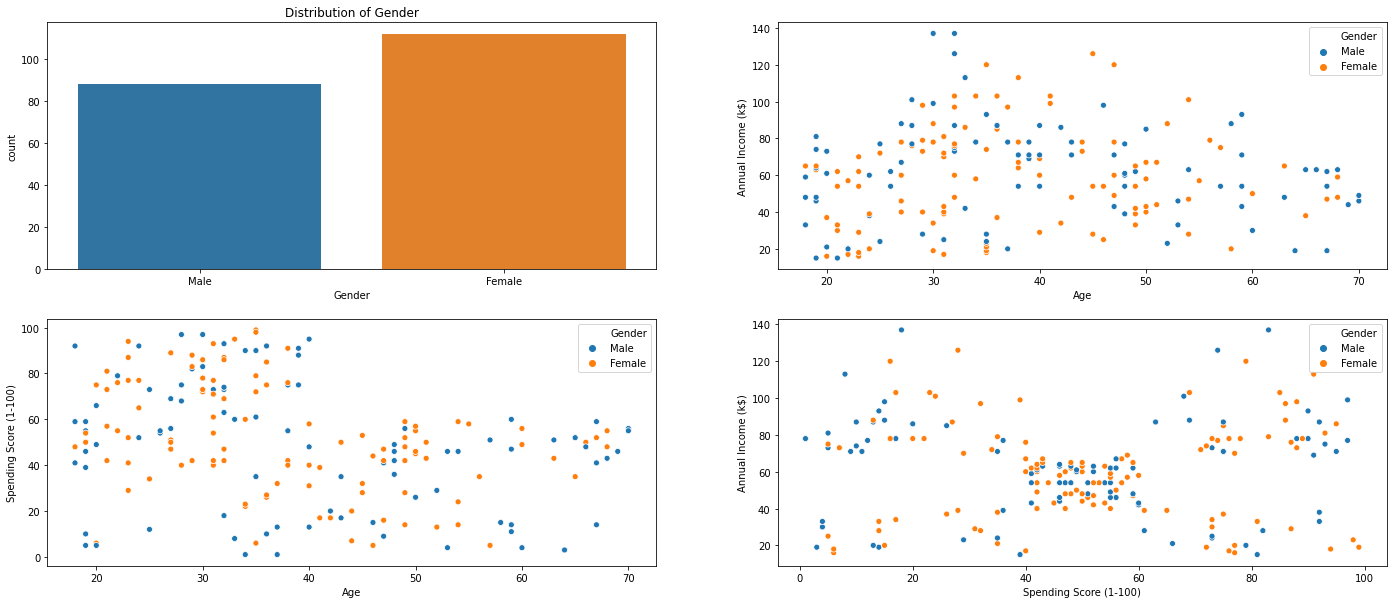

In [36]:
fig, ax = fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (24, 10))
ax = ax.ravel()
sns.countplot(x='Gender', data = mall, ax = ax[0]); ax[0].set_title('Distribution of Gender');
sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=mall, ax = ax[1])
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=mall, ax = ax[2])
sns.scatterplot('Spending Score (1-100)', 'Annual Income (k$)', hue='Gender', data=mall, ax = ax[3])

### Boxplot & histogram

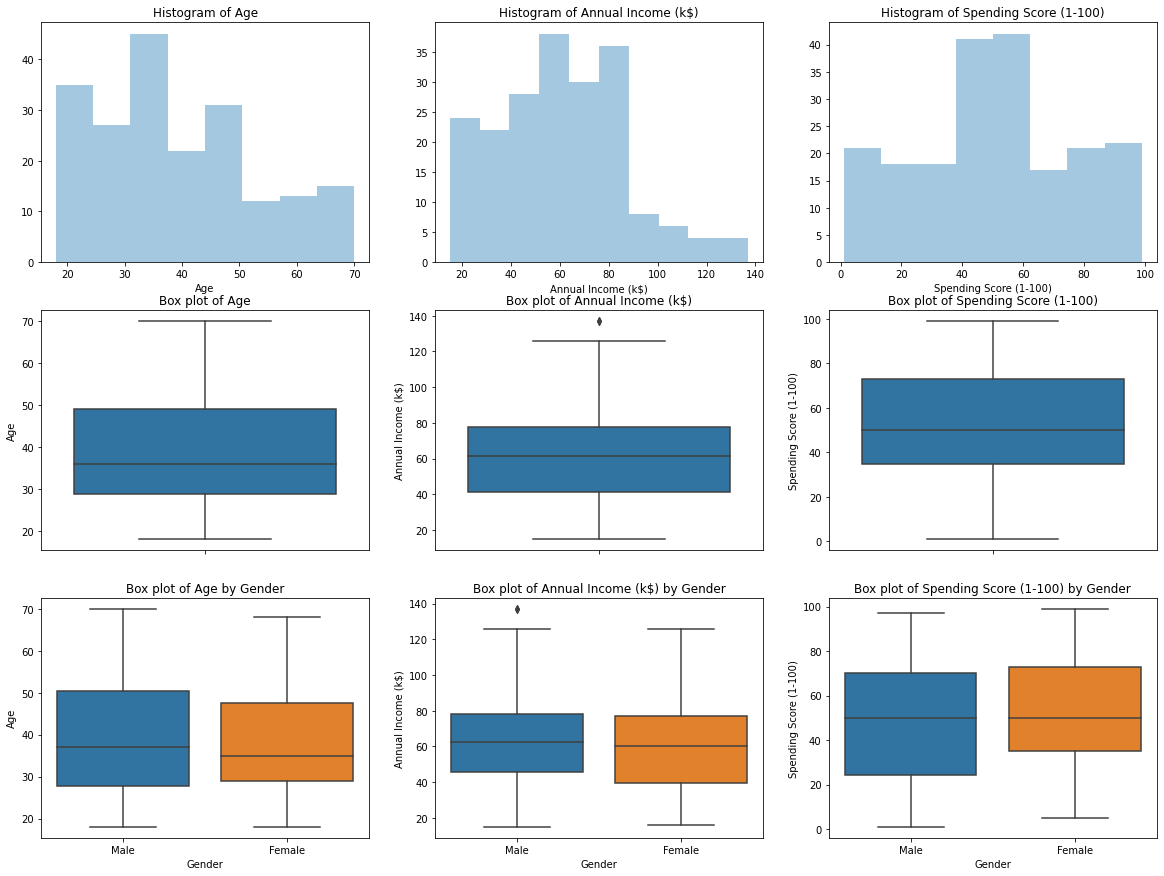

In [25]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 15))
ax = ax.ravel()
titles = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for k in range(3):
    sns.distplot(mall[titles[k]], ax = ax[k], kde = False); ax[k].set_title('Histogram of %s'%titles[k])
    sns.boxplot(mall[titles[k]], ax = ax[k+3], orient = "v"); ax[k+3].set_title('Box plot of %s'%titles[k])
    sns.boxplot(x=mall['Gender'], y=mall[titles[k]], ax = ax[k+6], orient = "v"); 
    ax[k+6].set_title('Box plot of %s by Gender'%titles[k])

### Heatmap

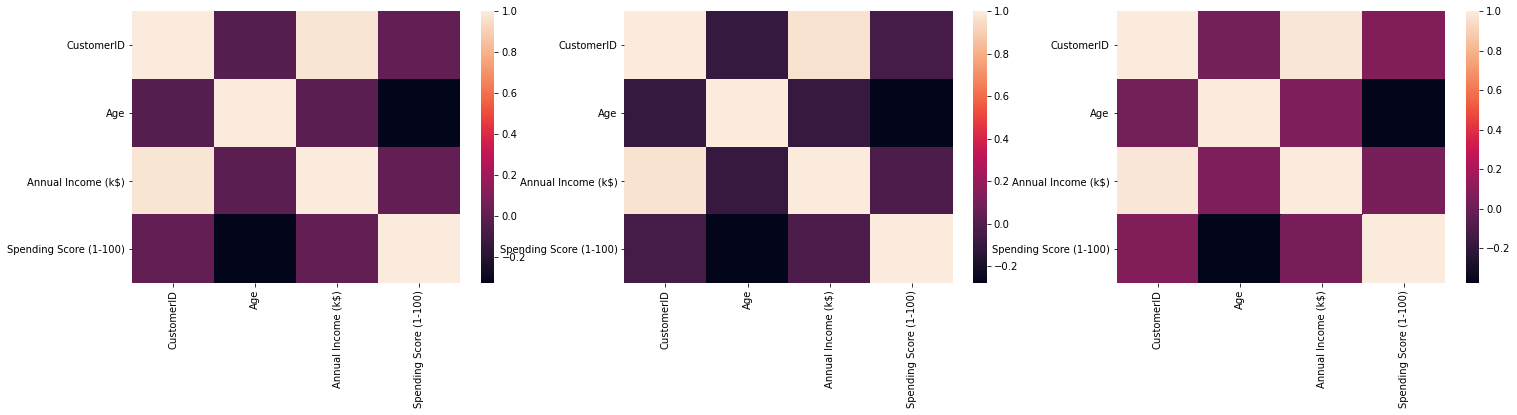

In [45]:
corr_mat_all = mall.corr()
corr_mat_M = mall[mall['Gender'] == 'Male'].corr()
corr_mat_F = mall[mall['Gender'] == 'Female'].corr()

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 5))
ax = ax.ravel()
sns.heatmap(corr_mat_all, ax = ax[0])
sns.heatmap(corr_mat_M, ax = ax[1])
sns.heatmap(corr_mat_F, ax = ax[2])

In [ ]:
import cv2